In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib as plt 

import warnings 
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

## loading the dataset 

training dataset 


testing dataset 

In [2]:
df_train=pd.read_csv('UNSW_NB15_training-set.csv')
df_test=pd.read_csv('UNSW_NB15_testing-set.csv')

In [3]:
df_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
df_test.head()


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [5]:
df_train.shape

(82332, 45)

In [6]:
df_train.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [7]:
df_train.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [9]:
df_train.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

## EDA (EXPLORATORY DATA ANALYSIS)

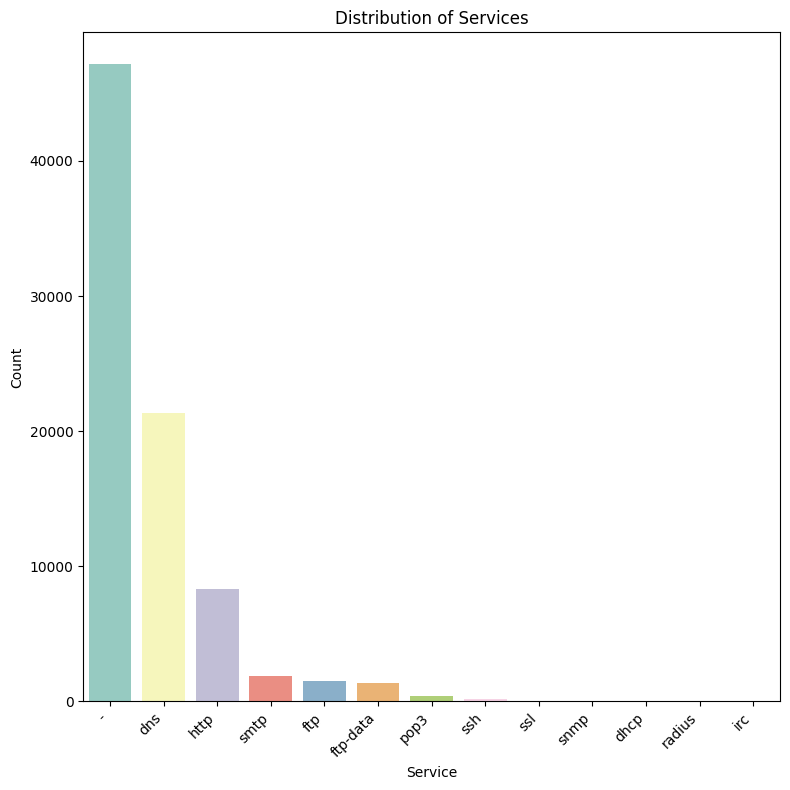

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'service' is the column you want to visualize
service_counts = df_train['service'].value_counts()

# Creating the bar plot using Seaborn
fig = plt.figure(figsize=(8, 8))  # Create a new figure object
sns.barplot(x=service_counts.index, y=service_counts.values, palette="Set3")
plt.title('Distribution of Services')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


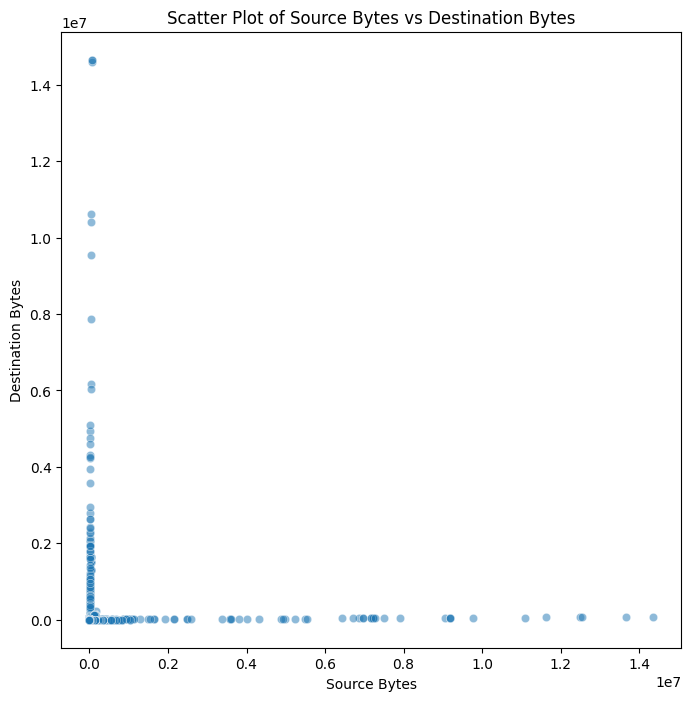

In [11]:

# Assuming 'sbytes' and 'dbytes' are the columns you want to visualize
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_train, x='sbytes', y='dbytes', alpha=0.5)  # 'alpha' adjusts transparency
plt.title('Scatter Plot of Source Bytes vs Destination Bytes')
plt.xlabel('Source Bytes')
plt.ylabel('Destination Bytes')
plt.show()


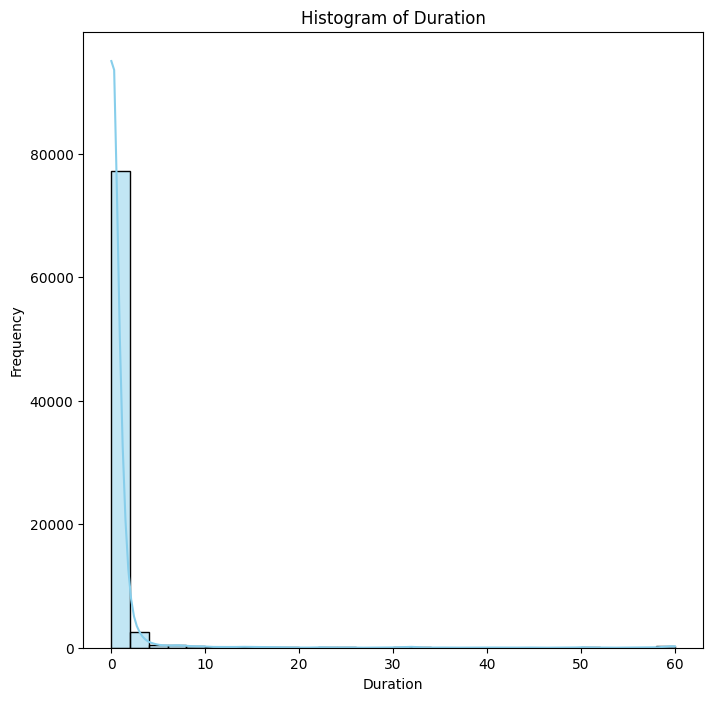

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dur' is the column you want to visualize
plt.figure(figsize=(8, 8))
sns.histplot(data=df_train, x='dur', bins=30, kde=True, color='skyblue')  # 'bins' controls the number of bins
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()


attack_cat
Analysis            677
Backdoor            583
DoS                4089
Exploits          11132
Fuzzers            6062
Generic           18871
Normal            37000
Reconnaissance     3496
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64


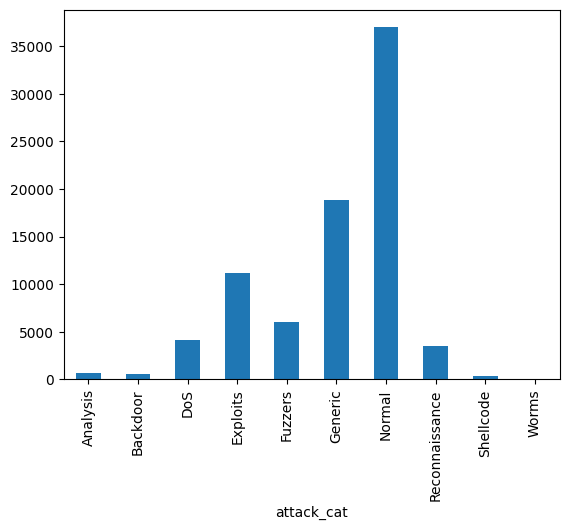

In [13]:
print(df_train.groupby(['attack_cat'])['attack_cat'].count())
df_train.groupby(['attack_cat'])['attack_cat'].count().plot(kind="bar")
plt.show()

label
0    37000
1    45332
Name: label, dtype: int64


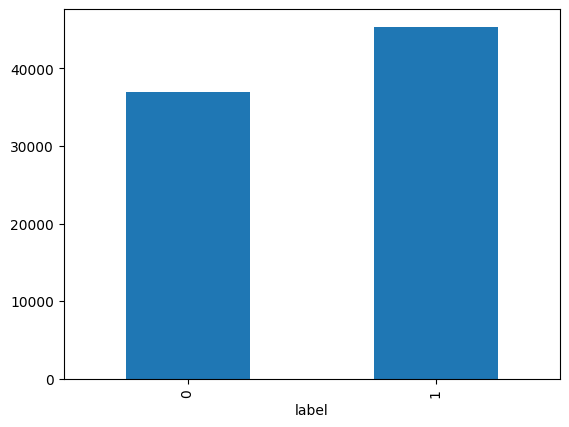

In [14]:
print(df_train.groupby(['label'])['label'].count())
df_train.groupby(['label'])['label'].count().plot(kind="bar")
plt.show()

normal = 0  and 1 = virus 

#### working on the test dataset 

In [15]:
df_test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


## concatination 

In [16]:
df_train['label']='df_train'
df_test['label']='df_test'

In [17]:
data=pd.concat([df_train,df_test])
data.shape

(257673, 45)

In [18]:
X=data.drop(['label','state'],axis=1)
y= data['label']

In [19]:
X=X.select_dtypes(np.number)
X

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,1,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,...,1,1,1,2,0,0,0,1,2,0
1,2,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,...,1,1,1,2,0,0,0,1,2,0
2,3,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,...,1,1,1,3,0,0,0,1,3,0
3,4,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,...,2,2,1,3,0,0,0,2,3,0
4,5,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,...,2,2,1,3,0,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,24,24,13,24,0,0,0,24,24,0
175337,175338,0.505762,10,8,620,354,33.612649,254,252,8.826286e+03,...,1,1,1,2,0,0,0,1,1,0
175338,175339,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,3,3,3,13,0,0,0,3,12,0
175339,175340,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,30,30,14,30,0,0,0,30,30,0


In [20]:
from sklearn import preprocessing as pp
label_encoder=pp.LabelEncoder()
label_encoder

LabelEncoder()

In [21]:
for column in data:
    data['label']=label_encoder.fit_transform(data['label'])

In [22]:
y=data['label']

In [23]:
from sklearn.metrics import roc_curve,auc
# Predicting the Test set results
from sklearn.metrics import confusion_matrix,accuracy_score

def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)


def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def accuracy(model):
    pred = model.predict(X_test1)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    #total_accuracy[str((str(model).split('(')[0]))] = accu

In [24]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['normal','virus']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

## using supervised machine learning 

## Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the logistic regression model on the training data
log_reg.fit(X_train, y_train)

# Predict the labels for the training set
y_pred_train_log_reg = log_reg.predict(X_train)

# Calculate the accuracy on the training set
train_accuracy_log_reg = accuracy_score(y_train, y_pred_train_log_reg)

# Predict the labels for the test set
y_pred_log_reg = log_reg.predict(X_test)

# Calculate the accuracy on the test set
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Print the accuracy of logistic regression
print('Accuracy of logistic regression:', accuracy_log_reg)
print('==================================================')


C:\Users\SBMCODED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of logistic regression: 0.701057533714951


C:\Users\SBMCODED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Confusion Matrix:
[[32555  2600]
 [12806  3574]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.93      0.81     35155
           1       0.58      0.22      0.32     16380

    accuracy                           0.70     51535
   macro avg       0.65      0.57      0.56     51535
weighted avg       0.67      0.70      0.65     51535



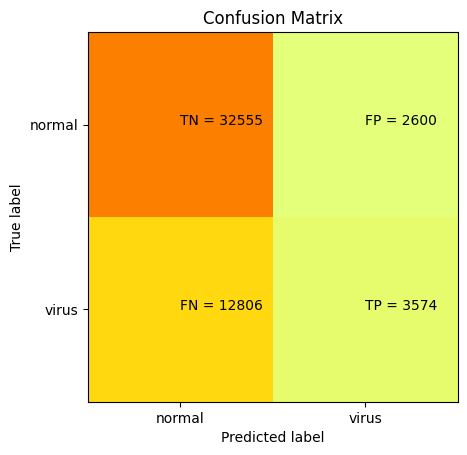

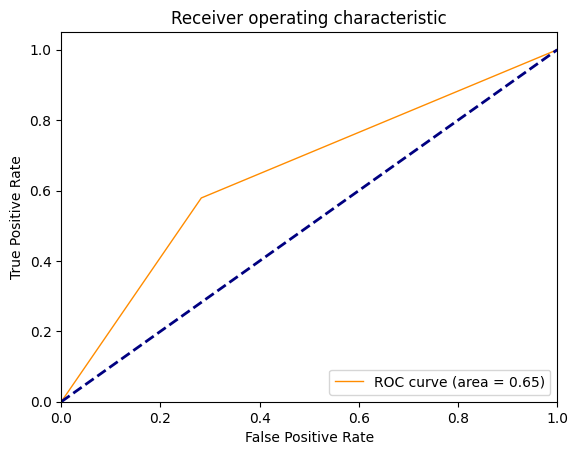

In [27]:
log_reg.fit(X_train,y_train)
pred_log=log_reg.predict(X_test)
report_performance(log_reg)
roc_curves(log_reg)

## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
decision_tree = DecisionTreeClassifier()

# Train the decision tree classifier on the training data
decision_tree.fit(X_train, y_train)

# Predict the labels for the training set
y_pred_train_decision_tree = decision_tree.predict(X_train)

# Calculate the accuracy on the training set
train_accuracy_decision_tree = accuracy_score(y_train, y_pred_train_decision_tree)

# Predict the labels for the test set
y_pred_decision_tree = decision_tree.predict(X_test)

# Calculate the accuracy on the test set
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

# Print the accuracy of decision tree classifier
print('Accuracy of decision tree classifier:', accuracy_decision_tree)
print('==================================================')


Accuracy of decision tree classifier: 0.9544969438245853




Confusion Matrix:
[[33962  1193]
 [ 1139 15241]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     35155
           1       0.93      0.93      0.93     16380

    accuracy                           0.95     51535
   macro avg       0.95      0.95      0.95     51535
weighted avg       0.95      0.95      0.95     51535



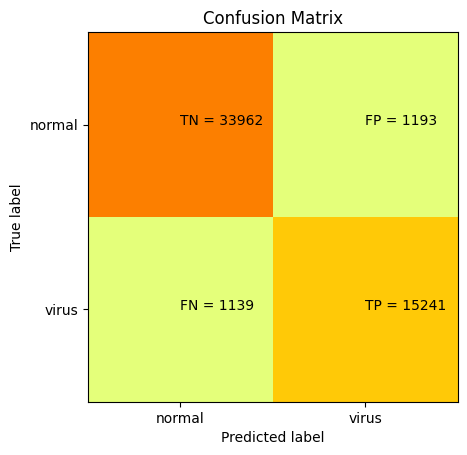

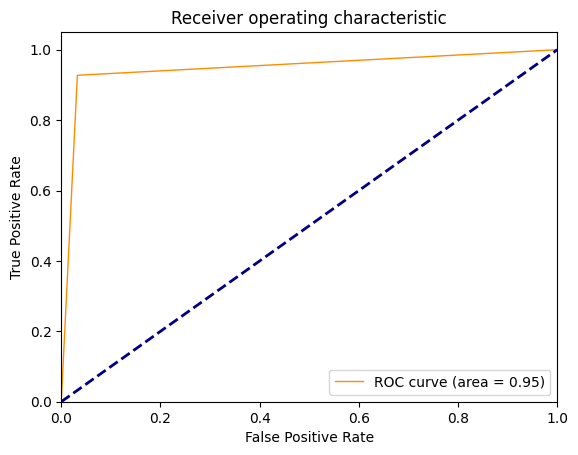

In [29]:
decision_tree.fit(X_train,y_train)
pred_dec=decision_tree.predict(X_test)
report_performance(decision_tree)
roc_curves(decision_tree)

## Naive bayes 

In [30]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the Naive Bayes classifier on the training data
naive_bayes.fit(X_train, y_train)

# Predict the labels for the training set
y_pred_train_naive_bayes = naive_bayes.predict(X_train)

# Calculate the accuracy on the training set
train_accuracy_naive_bayes = accuracy_score(y_train, y_pred_train_naive_bayes)

# Predict the labels for the test set
y_pred_naive_bayes = naive_bayes.predict(X_test)

# Calculate the accuracy on the test set
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)

# Print the accuracy of Naive Bayes classifier
print('Accuracy of Naive Bayes classifier:', accuracy_naive_bayes)
print('==================================================')


Accuracy of Naive Bayes classifier: 0.6336082274182594




Confusion Matrix:
[[28545  6610]
 [12272  4108]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.81      0.75     35155
           1       0.38      0.25      0.30     16380

    accuracy                           0.63     51535
   macro avg       0.54      0.53      0.53     51535
weighted avg       0.60      0.63      0.61     51535



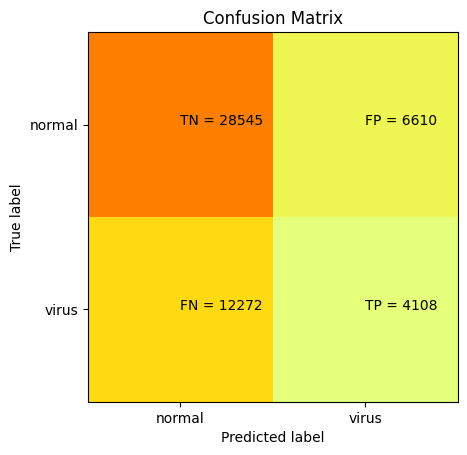

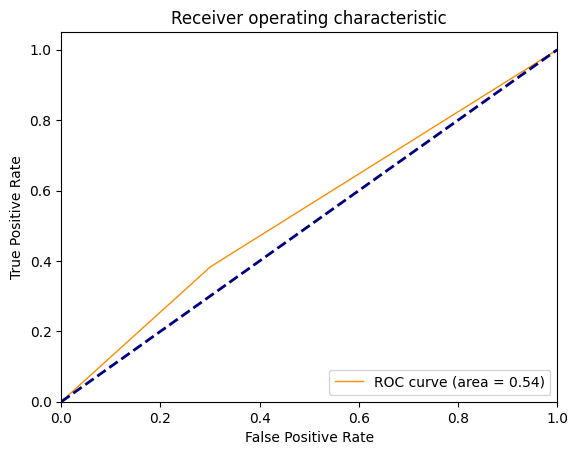

In [31]:
naive_bayes.fit(X_train,y_train)
pred_nai=naive_bayes.predict(X_test)
report_performance(naive_bayes)
roc_curves(naive_bayes)

## K-nearest neighbour 

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Predict the labels for the training set
y_pred_train_knn = knn.predict(X_train)

# Calculate the accuracy on the training set
train_accuracy_knn = accuracy_score(y_train, y_pred_train_knn)

# Predict the labels for the test set
y_pred_knn = knn.predict(X_test)

# Calculate the accuracy on the test set
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print the accuracy of KNN classifier
print('Accuracy of KNN classifier:', accuracy_knn)
print('==================================================')


Accuracy of KNN classifier: 0.7817793732414864




Confusion Matrix:
[[30793  4362]
 [ 6884  9496]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     35155
           1       0.69      0.58      0.63     16380

    accuracy                           0.78     51535
   macro avg       0.75      0.73      0.74     51535
weighted avg       0.78      0.78      0.78     51535



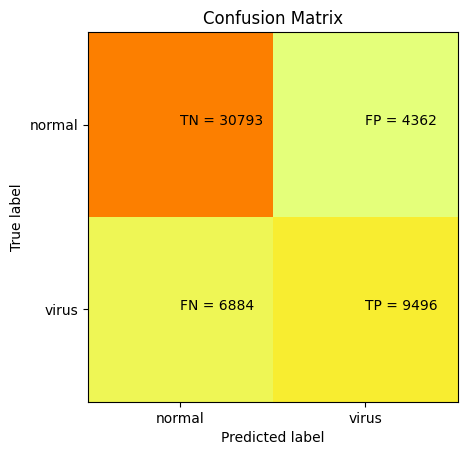

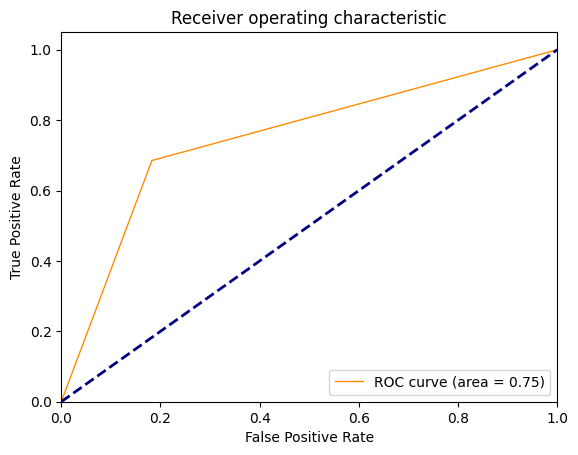

In [33]:
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
report_performance(knn)
roc_curves(knn)

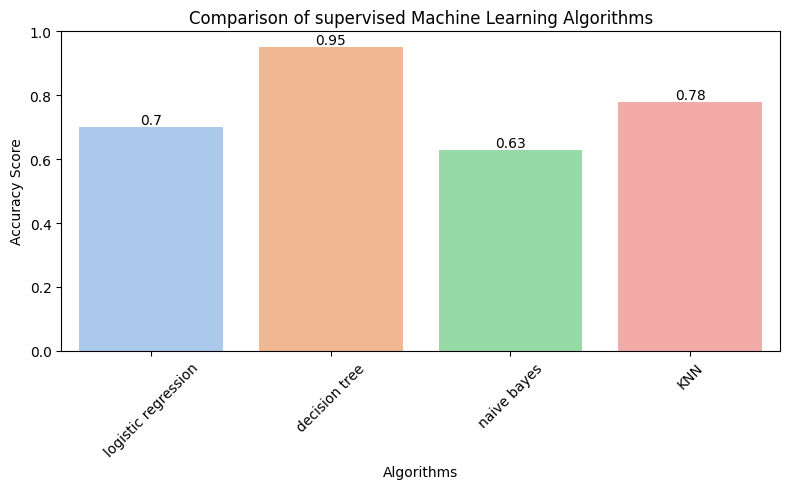

In [54]:
# Sample data for algorithm performance comparison
algorithms = ['logistic regression', 'decision tree', 'naive bayes', 'KNN']
accuracy_scores = [0.70, 0.95, 0.63, 0.78]

# Set custom colors
colors = sns.color_palette('pastel')

# Plotting the comparison using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=algorithms, y=accuracy_scores, palette=colors)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison of supervised Machine Learning Algorithms')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1

# Display the accuracy scores on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, str(score), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to prevent overlapping elements
plt.show()


## Ensembled models 

## gradient boosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred_train_gbc=gbc.predict(X_train)
train_accuracy_gbc=accuracy_score(y_train,y_pred_train_gbc)
y_pred_gbc=gbc.predict(X_test)
accuracy=accuracy_score(y_test,y_pred_gbc)
print('Accuracy of gradient boosting',accuracy)
print('==================================================')

Accuracy of gradient boosting 0.908256524691957




Confusion Matrix:
[[32969  2186]
 [ 2542 13838]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     35155
           1       0.86      0.84      0.85     16380

    accuracy                           0.91     51535
   macro avg       0.90      0.89      0.89     51535
weighted avg       0.91      0.91      0.91     51535



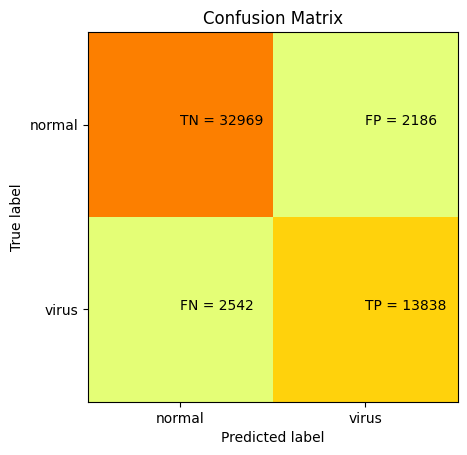

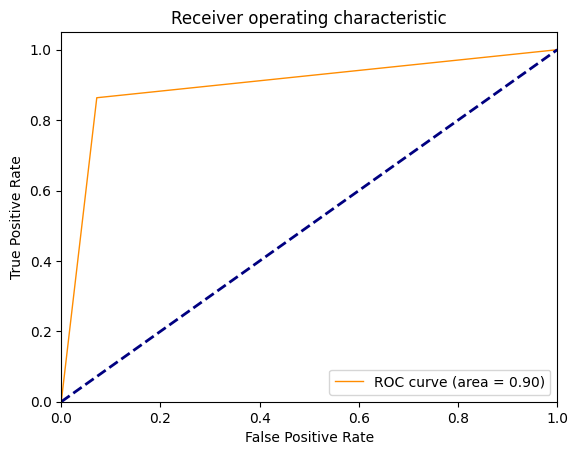

In [53]:
gbc.fit(X_train,y_train)
pred_gbc=gbc.predict(X_test)
report_performance(gbc)
roc_curves(gbc)

## Bagging classifier 

In [38]:
from sklearn.ensemble import BaggingClassifier

In [39]:

bc= BaggingClassifier()
bc.fit(X_train,y_train)
y_pred_train_bc=bc.predict(X_train)
train_accuracy_bc=accuracy_score(y_train,y_pred_train_bc)
y_pred_bc=bc.predict(X_test)
accuracy1=accuracy_score(y_test,y_pred_bc)
print(' Accuracy of bagging',accuracy1)
print('==================================================')

 Accuracy of bagging 0.9644125351702726




Confusion Matrix:
[[34346   809]
 [ 1040 15340]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     35155
           1       0.95      0.94      0.94     16380

    accuracy                           0.96     51535
   macro avg       0.96      0.96      0.96     51535
weighted avg       0.96      0.96      0.96     51535



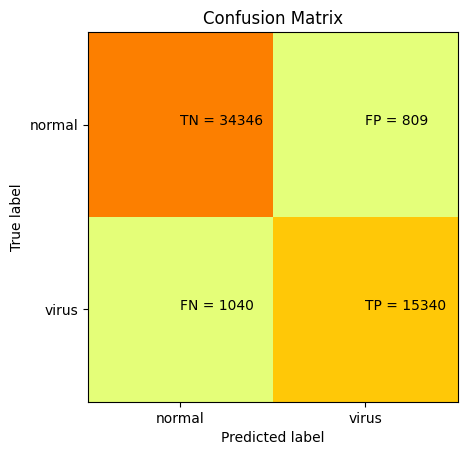

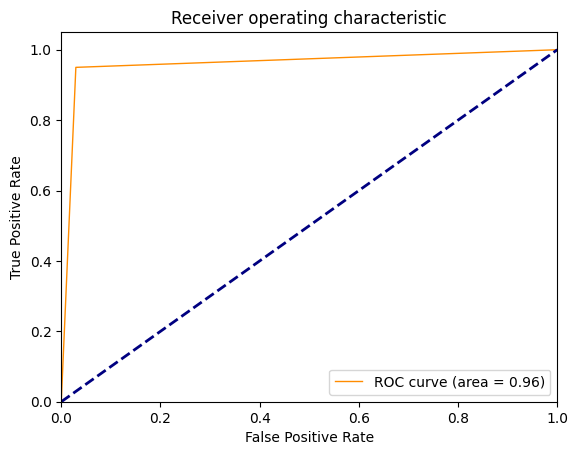

In [40]:
bc.fit(X_train,y_train)
pred_bc=bc.predict(X_test)
report_performance(bc)
roc_curves(bc)

## Stacking classifier 

In [41]:
from sklearn.metrics import roc_auc_score as roc 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier

# Create individual classifiers
clf1 = RandomForestClassifier()
clf2 = LogisticRegression()

# Create the stacking classifier with a list of classifiers and a meta-classifier
stacking_clf = StackingClassifier(classifiers=[clf1, clf2], meta_classifier=clf2)

In [42]:
# Fit the stacking classifier on the training data
stacking_clf.fit(X_train, y_train)

C:\Users\SBMCODED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(classifiers=[RandomForestClassifier(), LogisticRegression()],
                   meta_classifier=LogisticRegression())

In [43]:
# Make predictions on the testing data
y_pred = stacking_clf.predict(X_test)

In [44]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of stacking classifier:", accuracy)

Accuracy of stacking classifier: 0.9624915106238479


C:\Users\SBMCODED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Confusion Matrix:
[[34256   899]
 [ 1036 15344]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     35155
           1       0.94      0.94      0.94     16380

    accuracy                           0.96     51535
   macro avg       0.96      0.96      0.96     51535
weighted avg       0.96      0.96      0.96     51535



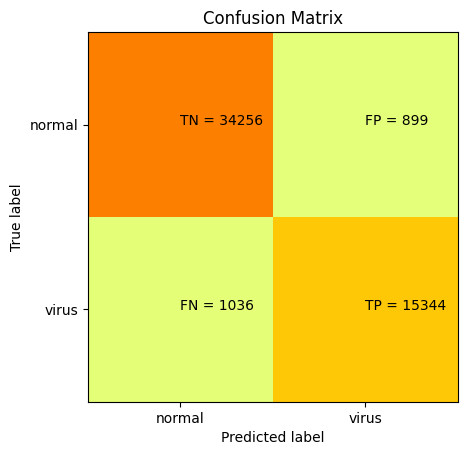

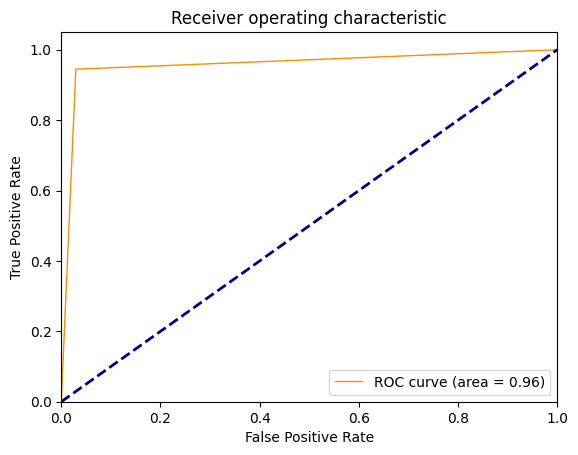

In [45]:
stacking_clf.fit(X_train,y_train)
pred_stc=stacking_clf.predict(X_test)
report_performance(stacking_clf)
roc_curves(stacking_clf)

## voting classifier 

In [46]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [47]:
# Create the Voting Classifier with a list of base classifiers and the voting method
voting_clf = VotingClassifier(estimators=[('rf', clf1), ('lr', clf2)], voting='hard')

In [48]:
# Fit the Voting Classifier on the training data
voting_clf.fit(X_train, y_train)

C:\Users\SBMCODED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('lr', LogisticRegression())])

In [49]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for voting :", accuracy)

Accuracy for voting : 0.9624915106238479


C:\Users\SBMCODED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Confusion Matrix:
[[35096    59]
 [12851  3529]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     35155
           1       0.98      0.22      0.35     16380

    accuracy                           0.75     51535
   macro avg       0.86      0.61      0.60     51535
weighted avg       0.81      0.75      0.69     51535



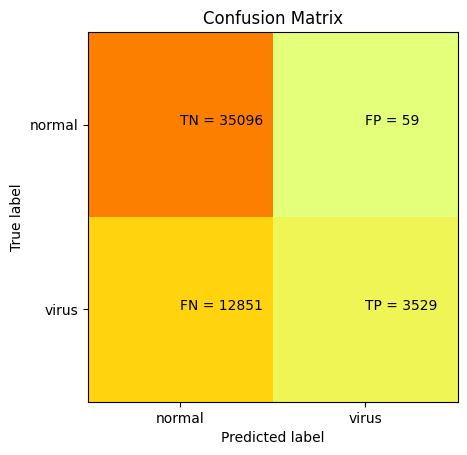

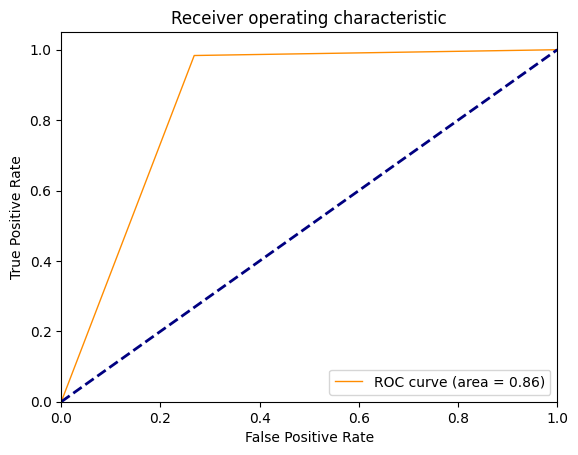

In [50]:
voting_clf.fit(X_train,y_train)
pred_vtc=voting_clf.predict(X_test)
report_performance(voting_clf)
roc_curves(voting_clf)

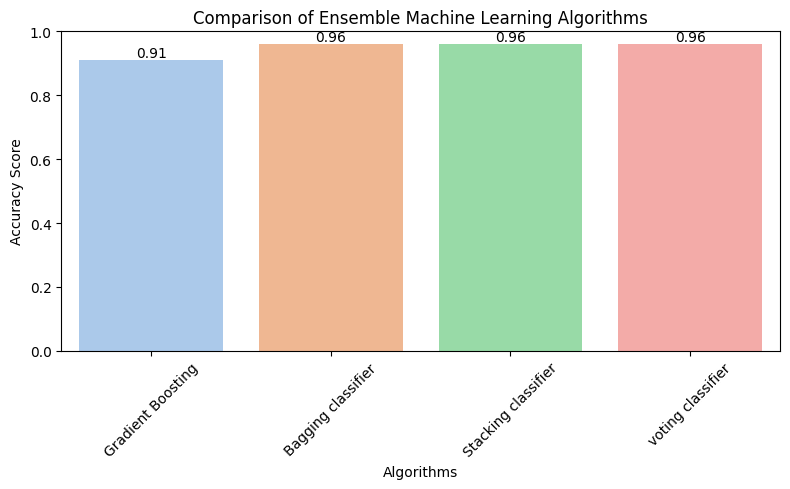

In [51]:
import seaborn as sns

# Sample data for algorithm performance comparison
algorithms = ['Gradient Boosting', 'Bagging classifier', 'Stacking classifier', 'voting classifier']
accuracy_scores = [0.91, 0.96, 0.96, 0.96]

# Set custom colors
colors = sns.color_palette('pastel')

# Plotting the comparison using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=algorithms, y=accuracy_scores, palette=colors)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Ensemble Machine Learning Algorithms')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1

# Display the accuracy scores on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, str(score), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to prevent overlapping elements
plt.show()


In [ ]:
import seaborn as sns

# Sample data for algorithm performance comparison
algorithms = ['Gradient Boosting', 'Bagging classifier', 'Stacking classifier', 'voting classifier','logistic regression', 'decision tree', 'naive bayes', 'KNN']
accuracy_scores = [0.91, 0.96, 0.96, 0.96,0.70, 0.95, 0.63, 0.786]

# Set custom colors
colors = sns.color_palette('pastel')

# Plotting the comparison using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=algorithms, y=accuracy_scores, palette=colors)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Ensemble and supervised Machine Learning Algorithms')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1

# Display the accuracy scores on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, str(score), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to prevent overlapping elements
plt.show()
